# Getting Started

In [ ]:
# Upload Kaggle json

!pip install -q kaggle
!pip install -q kaggle-cli
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Kaggle/kaggle.json" ~/.kaggle/ # Mount GDrive
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c fake-news -p dataset
!unzip /content/dataset/train.csv.zip
!unzip /content/dataset/test.csv.zip

     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 4.2MB 36.9MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 143kB 55.9MB/s 
     |████████████████████████████████| 112kB 59.2MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-sdkjzi04/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-sdkjzi04/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-u8uezym9/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.
{"username":"nabanitaroy","key":"ca9305e9d6b82e6852331c98234e9ef7"}Warning: Looks like you're using

In [ ]:
from time import time
import pandas as pd
import numpy as np
import re
import sys
import csv
csv.field_size_limit(sys.maxsize)

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10,10]
import seaborn as sns
sns.set_theme(style="darkgrid")
from wordcloud import WordCloud

import nltk
from nltk import sent_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize

!pip install contractions
import contractions

import itertools
import datetime
import time
from collections import Counter
import string

import pprint
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 327kB 30.0MB/s 
     |████████████████████████████████| 286kB 53.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85392 sha256=ab863279eed7bb6e042a633150b6971473457a43c98891fbf124536b470a94e4
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
train_df = pd.read_csv('/content/train.csv', header=0)
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_df.shape

(20800, 5)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


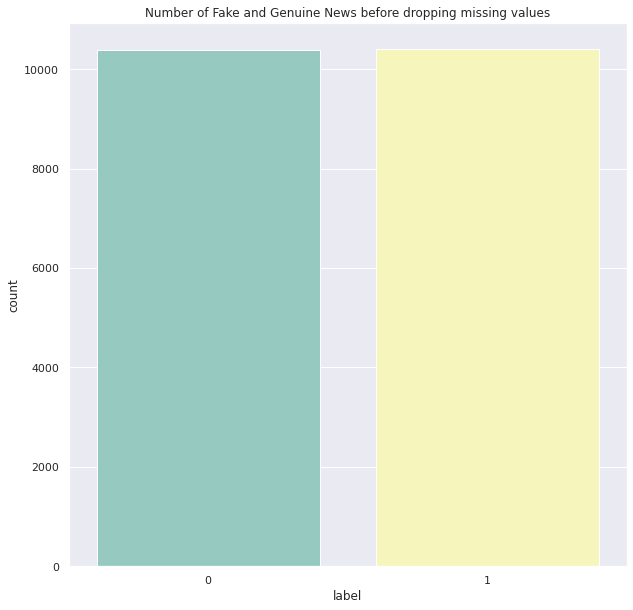

In [ ]:
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News before dropping missing values")
plt.show()

Slightly imabalnced with a ratio of ~ 4:5

In [ ]:
test_df = pd.read_csv('/content/test.csv', header=0)
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_df.shape

(5200, 4)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
train_df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test_df.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

## Drop all instances which have atleast one column missing

In [ ]:
train_df.dropna(axis=0, how='any',inplace=True)

In [ ]:
test_df=test_df.fillna(' ')

In [ ]:
train_df.shape, test_df.shape

((18285, 5), (5200, 4))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


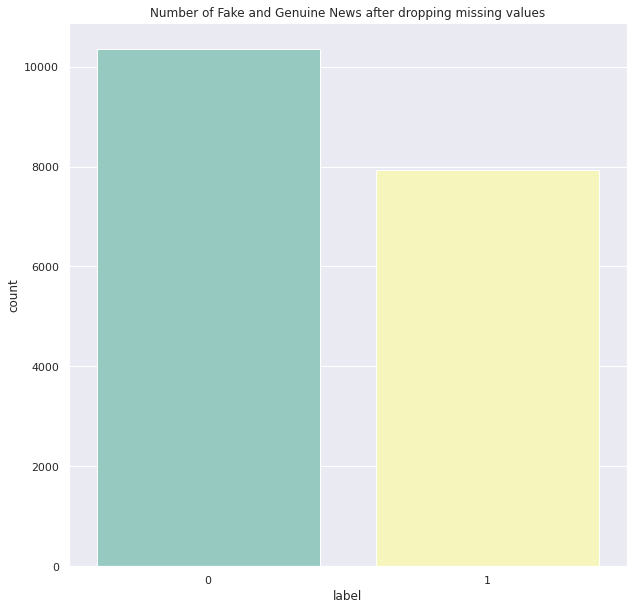

In [ ]:
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()

## Check length of Text

In [ ]:
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))

In [ ]:
train_df.head()

,id,title,author,text,label,raw_text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


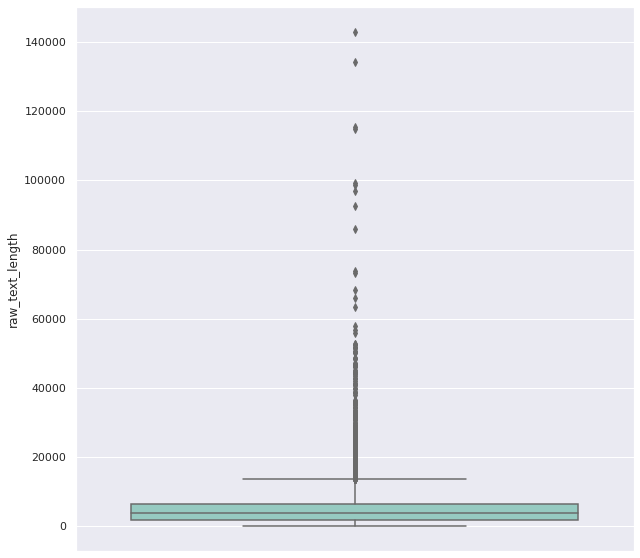

In [ ]:
sns.boxplot(y='raw_text_length', data=train_df, palette="Set3")
plt.show()

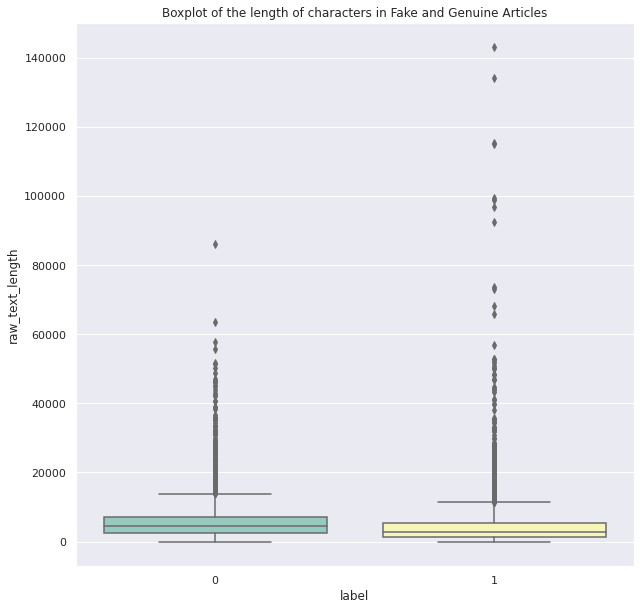

In [ ]:
sns.boxplot(y='raw_text_length', x='label', data=train_df, palette="Set3")
plt.title("Boxplot of the length of characters in Fake and Genuine Articles")
plt.show()

In [ ]:
train_df['raw_text_length'].describe()

count     18285.000000
mean       4800.181843
std        5225.865069
min           1.000000
25%        1834.000000
50%        3694.000000
75%        6535.000000
max      142961.000000
Name: raw_text_length, dtype: float64

In [ ]:
train_df[train_df['raw_text_length']==1]

,id,title,author,text,label,raw_text_length
82,82,Huma’s Weiner Dogs Hillary,Steve Sailer,,1,1
169,169,Mohamad Khweis: Another “Virginia Man” (Palest...,James Fulford,,1,1
295,295,A Connecticut Reader Reports Record Voter Regi...,VDARE.com Reader,,1,1
470,470,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,,1,1
592,592,Is your promising internet career over now Vin...,newsbiscuit editorial team,,1,1
...,...,...,...,...,...,...
19857,19857,"A Fifth Clinton Presidency? Hill, No!",Michelle Malkin,,1,1
19929,19929,98% of public now ‘really looking forward’ to ...,NewsBiscuit,,1,1
20242,20242,Radio Derb Transcript For October 21 Up: The M...,John Derbyshire,,1,1
20264,20264,Pro-sovereignty Legislators Demand That Admini...,Brenda Walker,,1,1


In [ ]:
train_df['text'] = train_df['text'].str.strip()

In [ ]:
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))

In [ ]:
train_df['raw_text_length'].describe()

count     18285.000000
mean       4799.886847
std        5225.922143
min           0.000000
25%        1834.000000
50%        3693.000000
75%        6535.000000
max      142961.000000
Name: raw_text_length, dtype: float64

In [ ]:
len(train_df[train_df['raw_text_length']==0])

74

# Start Over 
since ~ 600 rows I am discarding. I would rather replace the authors as blank and keep the article texts

In [ ]:
train_df = pd.read_csv('/content/train.csv', header=0)
train_df = train_df.fillna(' ')
train_df['text'] = train_df['text'].str.strip()
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))
print(len(train_df[train_df['raw_text_length']==0]))

116


In [ ]:
train_df.isna().sum()

id                 0
title              0
author             0
text               0
label              0
raw_text_length    0
dtype: int64

In [ ]:
train_df = train_df[train_df['raw_text_length'] > 0]
train_df.shape

(20684, 6)

In [ ]:
train_df.isna().sum()

id                 0
title              0
author             0
text               0
label              0
raw_text_length    0
dtype: int64

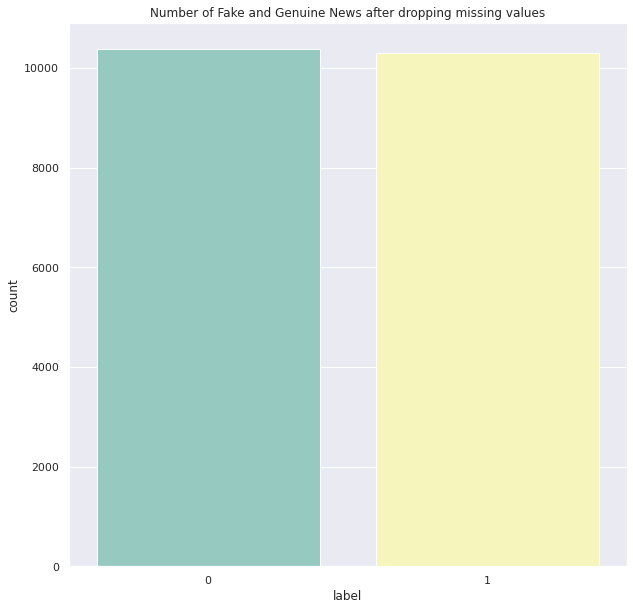

In [ ]:
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()

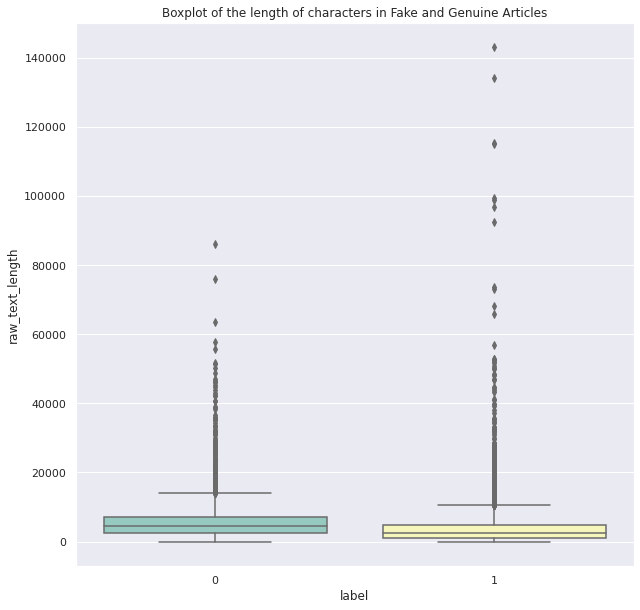

In [ ]:
sns.boxplot(y='raw_text_length', x='label', data=train_df, palette="Set3")
plt.title("Boxplot of the length of characters in Fake and Genuine Articles")
plt.show()

In [ ]:
train_df['raw_text_length'].describe()

count     20684.000000
mean       4569.360472
std        5132.617915
min           1.000000
25%        1641.750000
50%        3384.500000
75%        6288.250000
max      142961.000000
Name: raw_text_length, dtype: float64

In [ ]:
train_df[train_df['raw_text_length']==10]

,id,title,author,text,label,raw_text_length
5048,5048,,Anonymous,Brilliant!,1,10
8920,8920,,Anonymous,Brilliant!,1,10
10784,10784,,Jonathan white,are u dumb,1,10
12993,12993,2009 FLASHBACK: “What If” Remixed,Alex Ansary,11/08/2016,1,10
15582,15582,,Anonymous,Brilliant!,1,10
16929,16929,,Anonymous,Brilliant!,1,10
18006,18006,,william ketley,she is fit,1,10


These look like comments in the dataset. It will be difficult to separate. So I will keep them as it is and work on the next steps.

In [ ]:
len(train_df['author'].unique())

4196

In [ ]:
gen_news_authors = set(list(train_df[train_df['label']==0]['author'].unique()))
fake_news_authors = set(list(train_df[train_df['label']==1]['author'].unique()))

In [ ]:
overlapped_authors = gen_news_authors.intersection(fake_news_authors)

In [ ]:
len(gen_news_authors), len(fake_news_authors), len(overlapped_authors)

(2226, 1976, 6)

In [ ]:
train_df.head()

,id,title,author,text,label,raw_text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [ ]:
original_train_df = train_df.copy() 

## Text Cleaning

1. Remove special characters
2. Expand contractions
3. Convert to lower-case
4. Word Tokenize
5. Remove Stopwords

In [ ]:
def preprocess_text(x):
  cleaned_text = re.sub(r'[^a-zA-Z\d\s\']+', '', x)
  word_list = []
  for each_word in cleaned_text.split(' '):
    try:
      word_list.append(contractions.fix(each_word).lower())
    except:
      print(x)
  return " ".join(word_list)

## Got Error because of some sort of Turkish/Slavic language
ABÇin ilişkilerinde ABD ve NATOnun etkisi yazan Manlio Dinucci Uluslararası bir forumda konuşan İtalyan coğrafyacı Manlio Dinucci ABDnin tüm dünyaya egemen olabilmek için sahip olduğu silahların analizini bireşimleştirdi Suriye Rusya ve Çinin bugün elde silah herkesin açıkça kabul ettiği bu üstünlüğü dünyanın bu tek kutuplu örgütlenişi tartışılır hale getirmesinden dolayı bu makale daha da önem kazanmaktadır


Therefore I rearranged the order of preprocessing


In [ ]:
text_cols = ['text', 'title', 'author']

In [ ]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: preprocess_text(x))
  test_df[col] = test_df[col].apply(lambda x: preprocess_text(x)) 

Processing column: text
Processing column: title
Processing column: author
CPU times: user 1min 1s, sys: 170 ms, total: 1min 1s
Wall time: 1min 1s


In [ ]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(word_tokenize)
  test_df[col] = test_df[col].apply(word_tokenize)

Processing column: text
Processing column: title
Processing column: author
CPU times: user 1min 2s, sys: 715 ms, total: 1min 2s
Wall time: 1min 2s


In [ ]:
%%time
for col in text_cols:
  print("Processing column: {}".format(col))
  train_df[col] = train_df[col].apply(lambda x: [each_word for each_word in x if each_word not in stopwords])
  test_df[col] = test_df[col].apply(lambda x: [each_word for each_word in x if each_word not in stopwords])

Processing column: text
Processing column: title
Processing column: author
CPU times: user 37 s, sys: 95.8 ms, total: 37.1 s
Wall time: 37.1 s


In [ ]:
train_df.head() 

,id,title,author,text,label,raw_text_length
0,0,"[house, dem, aide, even, see, comeys, letter, ...","[darrell, lucus]","[house, dem, aide, even, see, comeys, letter, ...",1,4930
1,1,"[flynn, hillary, clinton, big, woman, campus, ...","[daniel, j, flynn]","[ever, get, feeling, life, circles, roundabout...",0,4160
2,2,"[truth, might, get, fired]",[consortiumnewscom],"[truth, might, get, fired, october, 29, 2016, ...",1,7692
3,3,"[15, civilians, killed, single, us, airstrike,...","[jessica, purkiss]","[videos, 15, civilians, killed, single, us, ai...",1,3237
4,4,"[iranian, woman, jailed, fictional, unpublishe...","[howard, portnoy]","[print, iranian, woman, sentenced, six, years,...",1,938


## Wordcloud

In [ ]:
# since count vectorizer expects strings

train_df['text_joined'] = train_df['text'].apply(lambda x: " ".join(x))
test_df['text_joined'] = test_df['text'].apply(lambda x: " ".join(x))

In [ ]:
train_df.head()

,id,title,author,text,label,raw_text_length,text_joined
0,0,"[house, dem, aide, even, see, comeys, letter, ...","[darrell, lucus]","[house, dem, aide, even, see, comeys, letter, ...",1,4930,house dem aide even see comeys letter jason ch...
1,1,"[flynn, hillary, clinton, big, woman, campus, ...","[daniel, j, flynn]","[ever, get, feeling, life, circles, roundabout...",0,4160,ever get feeling life circles roundabout rathe...
2,2,"[truth, might, get, fired]",[consortiumnewscom],"[truth, might, get, fired, october, 29, 2016, ...",1,7692,truth might get fired october 29 2016 tension ...
3,3,"[15, civilians, killed, single, us, airstrike,...","[jessica, purkiss]","[videos, 15, civilians, killed, single, us, ai...",1,3237,videos 15 civilians killed single us airstrike...
4,4,"[iranian, woman, jailed, fictional, unpublishe...","[howard, portnoy]","[print, iranian, woman, sentenced, six, years,...",1,938,print iranian woman sentenced six years prison...


In [ ]:
# iterate through the csv file
all_texts_gen = " ".join(train_df[train_df['label']==0]['text_joined'])
all_texts_fake = " ".join(train_df[train_df['label']==1]['text_joined'])

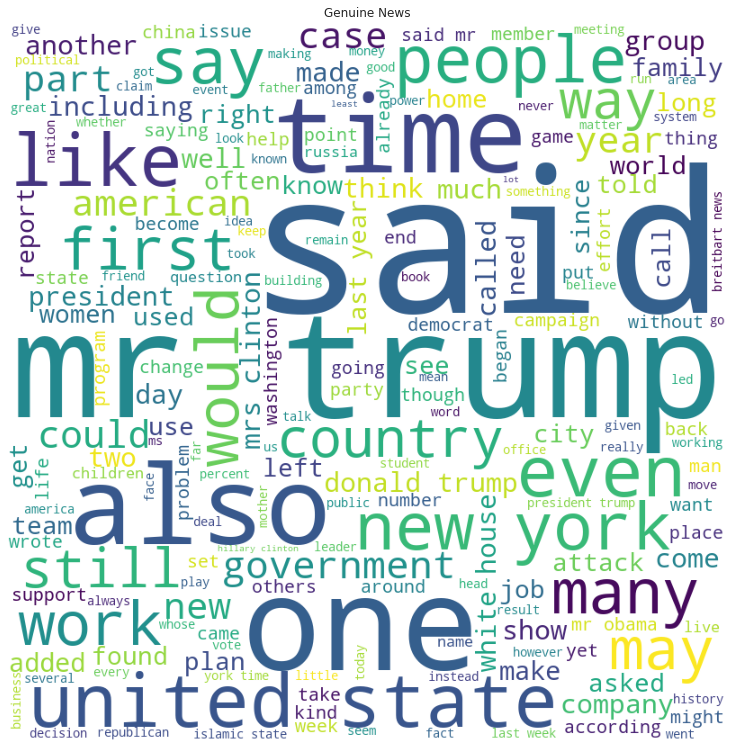

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_texts_gen)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genuine News")
plt.show()

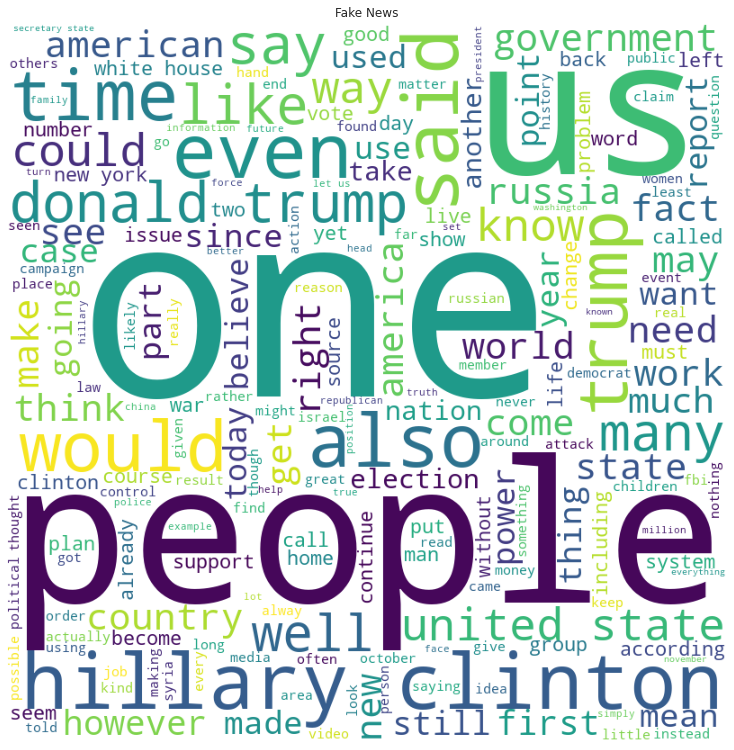

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_texts_fake)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Fake News")
plt.show()

## Stylometry

In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [ ]:
%%time
original_train_df['sent_tokens'] = original_train_df['text'].apply(sent_tokenize)

CPU times: user 28.6 s, sys: 151 ms, total: 28.8 s
Wall time: 28.8 s


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...


### Number of Sentence Per Article

In [ ]:
%%time
original_train_df['len_sentence'] = original_train_df['sent_tokens'].apply(len)

CPU times: user 6.99 ms, sys: 1 ms, total: 7.99 ms
Wall time: 7.99 ms


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens,len_sentence
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...,37
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...,29
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,...",51
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...,27
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...,5


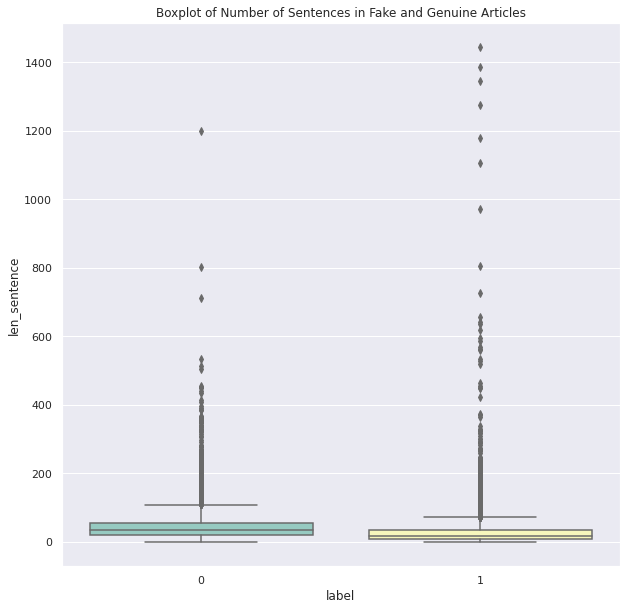

In [ ]:
sns.boxplot(y='len_sentence', x='label', data=original_train_df, palette="Set3")
plt.title("Boxplot of Number of Sentences in Fake and Genuine Articles")
plt.show()

### Average No. of Words per Sentence Article

In [ ]:
%%time
original_train_df['sent_word_tokens'] = original_train_df['sent_tokens'].apply(lambda x: [word_tokenize(each_sentence) for each_sentence in x])

CPU times: user 1min 55s, sys: 779 ms, total: 1min 55s
Wall time: 1min 55s


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens,len_sentence,sent_word_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...,37,"[[House, Dem, Aide, :, We, Didn, ’, t, Even, S..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...,29,"[[Ever, get, the, feeling, your, life, circles..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,...",51,"[[Why, the, Truth, Might, Get, You, Fired, Oct..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...,27,"[[Videos, 15, Civilians, Killed, In, Single, U..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...,5,"[[Print, An, Iranian, woman, has, been, senten..."


In [ ]:
%%time
def get_seq_tokens_cleaned(seq_tokens):
  no_punc_seq = [each_seq.translate(str.maketrans('', '', string.punctuation)) for each_seq in seq_tokens]
  sent_word_tokens = [word_tokenize(each_sentence) for each_sentence in no_punc_seq]
  return sent_word_tokens

original_train_df['sent_word_tokens'] = original_train_df['sent_tokens'].apply(lambda x: get_seq_tokens_cleaned(x))

CPU times: user 1min 45s, sys: 984 ms, total: 1min 46s
Wall time: 1min 46s


In [ ]:
original_train_df.head()

,id,title,author,text,label,raw_text_length,sent_tokens,len_sentence,sent_word_tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,[House Dem Aide: We Didn’t Even See Comey’s Le...,37,"[[House, Dem, Aide, We, Didn, ’, t, Even, See,..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160,[Ever get the feeling your life circles the ro...,29,"[[Ever, get, the, feeling, your, life, circles..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692,"[Why the Truth Might Get You Fired October 29,...",51,"[[Why, the, Truth, Might, Get, You, Fired, Oct..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237,[Videos 15 Civilians Killed In Single US Airst...,27,"[[Videos, 15, Civilians, Killed, In, Single, U..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938,[Print \nAn Iranian woman has been sentenced t...,5,"[[Print, An, Iranian, woman, has, been, senten..."


In [ ]:
def get_average_words_in_sent(seq_word_tokens):
  return np.mean([len(seq) for seq in seq_word_tokens])

In [ ]:
%%time
original_train_df['avg_words_per_sent'] = original_train_df['sent_word_tokens'].apply(lambda x: get_average_words_in_sent(x))

CPU times: user 330 ms, sys: 3 ms, total: 333 ms
Wall time: 334 ms


In [ ]:
original_train_df['avg_words_per_sent'].describe()

count    20684.000000
mean        24.003057
std         10.499971
min          1.000000
25%         19.274877
50%         23.083333
75%         27.153846
max        327.000000
Name: avg_words_per_sent, dtype: float64

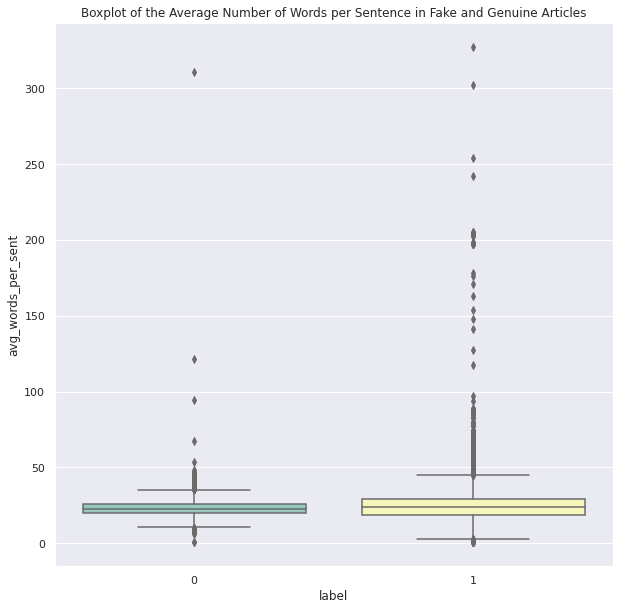

In [ ]:
sns.boxplot(y='avg_words_per_sent', x='label', data=original_train_df, palette="Set3")
plt.title("Boxplot of the Average Number of Words per Sentence in Fake and Genuine Articles")
plt.show()

### Average Word Length per Article

In [ ]:
def get_average_word_length(seq_word_tokens):
  return np.mean([len(word) for seq in seq_word_tokens for word in seq])

In [ ]:
%%timeit
original_train_df['avg_word_length'] = original_train_df['sent_word_tokens'].apply(lambda x: get_average_words_in_sent(x))

1 loop, best of 5: 331 ms per loop


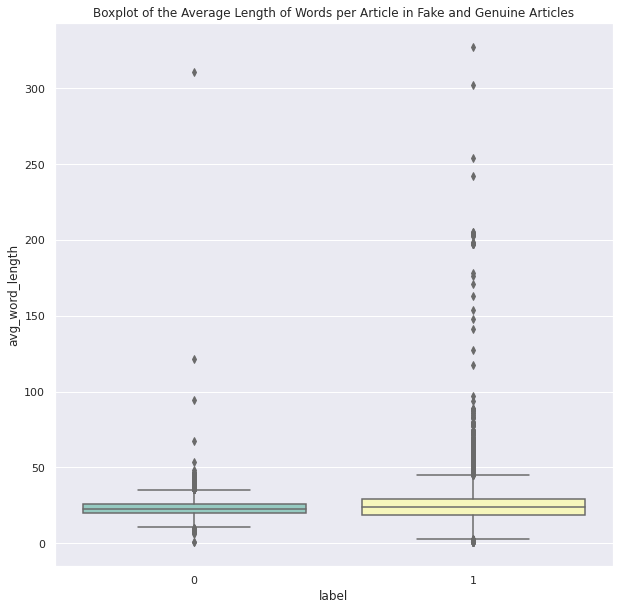

In [ ]:
sns.boxplot(y='avg_word_length', x='label', data=original_train_df, palette="Set3")
plt.title("Boxplot of the Average Length of Words per Article in Fake and Genuine Articles")
plt.show()

### POS Tag Counts

In [ ]:
all_tokenized_gen = [a for b in train_df[train_df['label']==0]['text'].tolist() for a in b]
all_tokenized_fake = [a for b in train_df[train_df['label']==1]['text'].tolist() for a in b]

In [ ]:
len(all_tokenized_gen), len(all_tokenized_fake)

(5100293, 3701951)

In [ ]:
def get_post_tags_list(tokenized_articles):
  all_pos_tags = []
  for word in tokenized_articles:
    pos_tag = nltk.pos_tag([word])[0][1]
    all_pos_tags.append(pos_tag)
  return all_pos_tags

In [ ]:
%%time
all_pos_tagged_word_gen = get_post_tags_list(all_tokenized_gen)
all_pos_tagged_word_fake = get_post_tags_list(all_tokenized_fake)

CPU times: user 15min 29s, sys: 45.7 s, total: 16min 15s
Wall time: 16min 13s


In [ ]:
all_pos_tagged_word_gen[:5], all_pos_tagged_word_fake[:5]

(['RB', 'VB', 'VBG', 'NN', 'NNS'], ['NN', 'NN', 'NN', 'RB', 'VB'])

In [ ]:
gen_pos_df = pd.DataFrame(dict(Counter(all_pos_tagged_word_gen)).items(), columns=['Pos_tag', 'Genuine News'])
fake_pos_df = pd.DataFrame(dict(Counter(all_pos_tagged_word_fake)).items(), columns=['Pos_tag', 'Fake News'])

In [ ]:
gen_pos_df

,Pos_tag,Genuine News
0,RB,232766
1,VB,86026
2,VBG,210332
3,NN,2571481
4,NNS,761798
5,IN,70709
6,VBN,270905
7,JJ,446403
8,CD,170398
9,MD,51142


In [ ]:
fake_pos_df

,Pos_tag,Fake News
0,NN,1908587
1,RB,181327
2,VB,71331
3,NNS,537863
4,VBN,173962
5,CD,118786
6,JJ,340930
7,JJS,9734
8,VBG,149353
9,IN,47955


In [ ]:
pos_df = gen_pos_df.merge(fake_pos_df, on='Pos_tag')

In [ ]:
pos_df['Genuine News'] = pos_df['Genuine News'] * 100 / pos_df['Genuine News'].sum()
pos_df['Fake News'] = pos_df['Fake News'] * 100 / pos_df['Fake News'].sum()
pos_df.head()

,Pos_tag,Genuine News,Fake News
0,RB,4.563777,4.909792
1,VB,1.686687,1.931430
2,VBG,4.123920,4.044032
3,NN,50.418299,51.678815
4,NNS,14.936358,14.563718


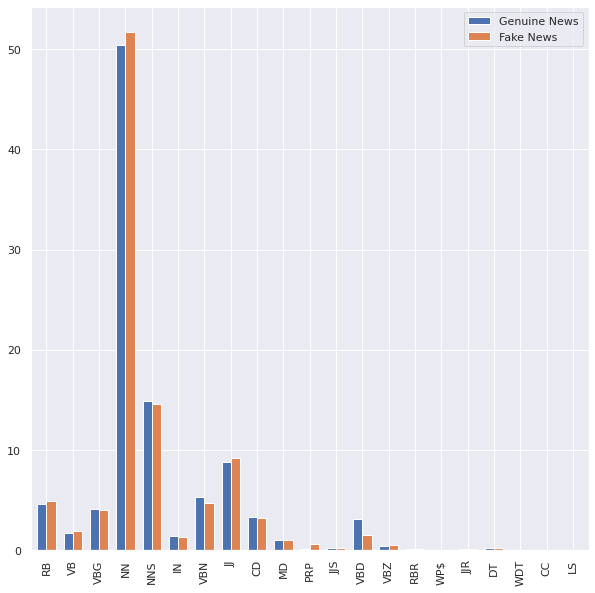

In [ ]:
pos_df.plot.bar(width=0.7)
plt.xticks(range(0,len(pos_df['Pos_tag'])), pos_df['Pos_tag'])
plt.show()

## Model Training

In [ ]:
tf_idf_transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))

# fit train data to count vectorizer
count_vectorizer.fit(train_df['text_joined'].values)
count_vect_train = count_vectorizer.transform(train_df['text_joined'].values)

# fit ngrams count to tfidf transformers
tf_idf_transformer.fit(count_vect_train)
tf_idf_train = tf_idf_transformer.transform(count_vect_train)

KeyboardInterrupt: ignored

In [ ]:
# Transform the test data as well
count_vect_test = count_vectorizer.transform(test_df['text_joined'].values)
tf_idf_test = tf_idf_transformer.transform(count_vect_test)

In [ ]:
target = train_df['label'].values

# Train Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_train, target, random_state=0)

In [ ]:
df_perf_metrics = pd.DataFrame(columns  =['Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision', 'Recall', 'f1_score'])

# Machine Learning Classifier Training and Validating

In [ ]:
df_perf_metrics = pd.DataFrame(columns = ['Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision', 'Recall', 'f1_score', 'Training Time (secs'])
models_trained_list = []

def get_perf_metrics(model, i):
  # model name
  model_name = type(model).__name__
  # time keeping
  start_time = time.time()
  print("Training {} model...".format(model_name))
  # Fitting of model
  model.fit(X_train, y_train)
  print("Completed {} model training.".format(model_name))
  elapsed_time = time.time() - start_time
  # Time Elapsed
  print("Time elapsed: {:.2f} s.".format(elapsed_time))
  # Predictions
  y_pred = model.predict(X_test)
  # Add to ith row of dataframe - metrics 
  df_perf_metrics.loc[i] = [model_name,
                            model.score(X_train, y_train),
                            model.score(X_test, y_test),
                            precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred),
                            f1_score(y_test, y_pred),
                            "{:.2f}".format(elapsed_time)]
  # keep a track of trained models
  models_trained_list.append(model)
  print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
models_list = [LogisticRegression(C=1e5),
               RandomForestClassifier(n_estimators=5),
               ExtraTreesClassifier(n_estimators=5,n_jobs=4),
               AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=5)]

In [ ]:
%%time
for n, model in enumerate(models_list):
  get_perf_metrics(model, n)

In [ ]:
df_perf_metrics

In [ ]:
# Predicting the test dataframe and create submit.csv
# Picking up Logistic Regression since it has the best performance

submit_predictions = model[0].predict(tf_idf_test)

In [ ]:
submit_predictions

In [ ]:
len(submit_predictions)

In [ ]:
sns.countplot(submit_predictions, palette='Set3')
plt.title("Count of Genuine and Fake News of the Test Data")
plt.show()

In [ ]:
train_df['label'].value_counts() * 100/len(train_df)

0    50.217559
1    49.782441
Name: label, dtype: float64

In [ ]:
np.bincount(submit_predictions)* 100 / len(submit_predictions)

array([49.59615385, 50.40384615])

In [ ]:
submit_predictions_df = pd.DataFrame()
submit_predictions_df['id'] = test_df['id']
submit_predictions_df['label'] = submit_predictions

In [ ]:
submit_predictions_df.head()

,id,label
0,20800,0
1,20801,0
2,20802,0
3,20803,0
4,20804,1


In [ ]:
submit_predictions_df.to_csv('submit.csv',index=False)

# Adding Title and Author Information to the Text

In [ ]:
train_df['all_info'] = train_df['text'] + train_df['title'] + train_df['author'] 
train_df['all_info'] = train_df['all_info'].apply(lambda x: " ".join(x))

test_df['all_info'] = test_df['text'] + test_df['title'] + test_df['author'] 
test_df['all_info'] = test_df['all_info'].apply(lambda x: " ".join(x))

In [ ]:
tf_idf_transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
count_vect_train = count_vectorizer.fit_transform(train_df['all_info'].values)
tf_idf_train = tf_idf_transformer.fit_transform(count_vect_train)

X_train, X_test, y_train, y_test = train_test_split(tf_idf_train, target, random_state=0)

In [ ]:
%%time
for n, model in enumerate(models_list):
  get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 53.53 s.
Completed LogisticRegression model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 16.77 s.
Completed RandomForestClassifier model's performance assessment.
Training ExtraTreesClassifier model...
Completed ExtraTreesClassifier model training.
Time elapsed: 33.67 s.
Completed ExtraTreesClassifier model's performance assessment.
Training AdaBoostClassifier model...
Completed AdaBoostClassifier model training.
Time elapsed: 236.27 s.
Completed AdaBoostClassifier model's performance assessment.
CPU times: user 6min 22s, sys: 25.5 s, total: 6min 48s
Wall time: 5min 45s


In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score,Training Time (secs
0,LogisticRegression,1.000000,0.979659,0.978305,0.974862,0.976580,53.53
1,RandomForestClassifier,0.986509,0.848644,0.882145,0.752640,0.812263,16.77
2,ExtraTreesClassifier,1.000000,0.868329,0.891587,0.793866,0.839894,33.67
3,AdaBoostClassifier,0.969299,0.956693,0.944417,0.956762,0.950549,236.27


# NLP using Deep Learning with Keras

In [ ]:
all_text = train_df["all_info"].astype(str).tolist()
all_text[0]

"house dem aide even see comeys letter jason chaffetz tweeted darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license apologies keith olbermann doubt worst person world weekfbi director james comey according house democratic aide looks like also know secondworst person well turns comey sent nowinfamous letter announcing fbi looking emails may related hillary clintons email server ranking democrats relevant committees hear comey found via tweet one republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october

In [ ]:
tokenizer = Tokenizer(oov_token = "<OOV>", num_words=6000)
tokenizer.fit_on_texts(all_text)
word_index = tokenizer.word_index
len(word_index)

189867

In [ ]:
sequences = tokenizer.texts_to_sequences(all_text)
padded = pad_sequences(sequences, padding = 'post', maxlen=6000)
padded[0]

array([  42, 4932, 2085, ...,    0,    0,    0], dtype=int32)

In [ ]:
padded.shape

(20684, 6000)

In [ ]:
def get_model():
    model=Sequential()
    model.add(Embedding(6000, 300 ,input_length=6000))
    model.add(Dropout(0.3))
    model.add(LSTM(200))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 6000, 300)         1800000   
_________________________________________________________________
dropout (Dropout)            (None, 6000, 300)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               400800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 2,201,001
Trainable params: 2,201,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, target, test_size=0.2)

In [ ]:
callbacks=[
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, 
                                  verbose=1, mode="min", restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath="best_model.hdf5", verbose=1, save_best_only=True)
]

In [ ]:
model = get_model()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
%%time
history = model.fit([X_train], 
                    y_train, 
                    epochs=10,
                    batch_size=64, 
                    validation_data=([X_test], y_test), 
                    callbacks=callbacks)

Epoch 1/10
259/259 [==============================] - 234s 778ms/step - loss: 0.6952 - accuracy: 0.4879 - val_loss: 0.6944 - val_accuracy: 0.4958

Epoch 00001: val_loss improved from inf to 0.69437, saving model to best_model.hdf5
Epoch 2/10
259/259 [==============================] - 201s 777ms/step - loss: 0.6937 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4958

Epoch 00002: val_loss improved from 0.69437 to 0.69324, saving model to best_model.hdf5
Epoch 3/10
259/259 [==============================] - 203s 783ms/step - loss: 0.6936 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5047

Epoch 00003: val_loss improved from 0.69324 to 0.69312, saving model to best_model.hdf5
Epoch 4/10
259/259 [==============================] - 205s 790ms/step - loss: 0.6935 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5047

Epoch 00004: val_loss improved from 0.69312 to 0.69309, saving model to best_model.hdf5
Epoch 5/10
259/259 [==============================] - 212s 817ms

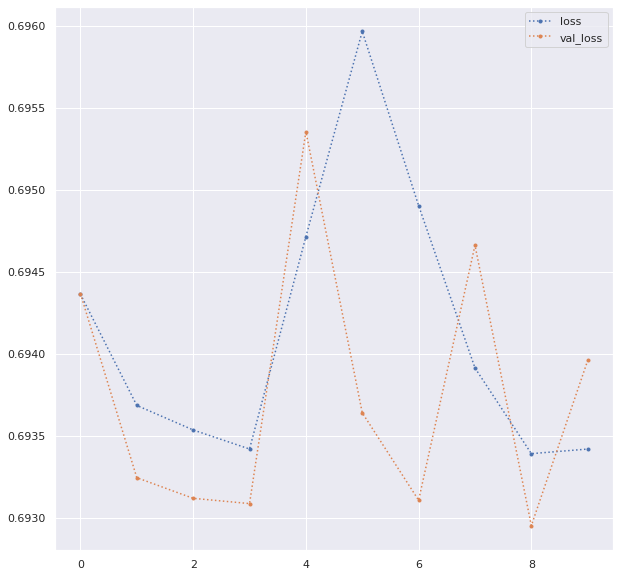

In [ ]:
metric_toplot = "loss"
plt.plot(history.epoch, history.history[metric_toplot], ".:", label="loss")
plt.plot(history.epoch, history.history["val_"+metric_toplot], ".:", label="val_loss")
plt.legend()

In [ ]:
model = keras.models.load_model('best_model.hdf5')

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
y_test.shape, y_pred.shape

((3657,), (3657, 1))

In [ ]:
precision_score(y_test, y_pred)

1.0

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2058,    0],
       [1595,    4]])

In [ ]:
recall_score(y_test, y_pred)

0.0025015634771732333

In [ ]:
test_df

In [ ]:
all_test_text = test_df["all_info"].astype(str).tolist()
test_sequences = tokenizer.texts_to_sequences(all_test_text)
test_padded = pad_sequences(test_sequences, padding = 'post', maxlen=6000)

KeyError: ignored

In [ ]:
test_padded[0]

array([   1,    1, 3205, ...,    0,    0,    0], dtype=int32)

In [ ]:
y_pred = model.predict_classes(test_padded)

In [ ]:
y_pred.shape, y_pred

((5200, 1), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int32))

In [ ]:
submit_lstm_predictions_df = pd.DataFrame()
submit_lstm_predictions_df['id'] = test_df['id']
submit_lstm_predictions_df['label'] = y_pred.astype(int)

In [ ]:
submit_lstm_predictions_df

,id,label
0,20800,0
1,20801,0
2,20802,0
3,20803,0
4,20804,0
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,0


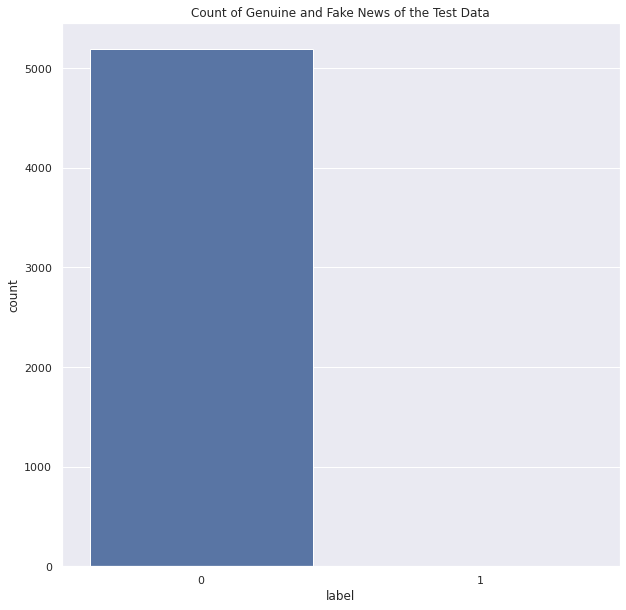

In [ ]:
sns.countplot(submit_lstm_predictions_df['label'])
plt.title("Count of Genuine and Fake News of the Test Data")
plt.show()

In [ ]:
submit_predictions_df.to_csv('submit.csv',index=False)